In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2


In [2]:
NCDS_data = pd.read_csv("National_Health_Interview_Survey__NHIS__-_National_Cardiovascular_Disease_Surveillance_Data.csv") 

In [3]:
NCDS_data.columns

Index(['RowId', 'YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Break_Out_Category', 'Break_Out', 'ClassId', 'TopicId', 'QuestionId',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationId',
       'Geolocation'],
      dtype='object')

In [4]:
NCDS_data_abbrv = NCDS_data[['YearStart', 'LocationDesc','PriorityArea1', 'PriorityArea3',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit',
       'Data_Value','Break_Out_Category', 'Break_Out']]
NCDS_data_abbrv

,YearStart,LocationDesc,PriorityArea1,PriorityArea3,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out
0,2019,United States,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),7.1,Overall,Overall
1,2019,United States,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),8.4,Overall,Overall
2,2019,United States,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),9.6,Gender,Male
3,2019,United States,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),8.4,Gender,Male
4,2019,United States,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),7.3,Gender,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2020,West,NaN,NaN,Risk Factors,Hypertension,Prevalence of hypertension medication use amon...,Crude,Percent (%),14.3,Race,Hispanic
1646,2020,West,NaN,NaN,Risk Factors,Hypertension,Prevalence of hypertension medication use amon...,Age-Standardized,Percent (%),17.1,Race,Hispanic
1647,2020,West,NaN,NaN,Risk Factors,Hypertension,Prevalence of hypertension medication use amon...,Age-Standardized,Percent (%),23.3,Race,Other
1648,2020,West,NaN,NaN,Risk Factors,Hypertension,Prevalence of hypertension medication use amon...,Crude,Percent (%),21.6,Race,Other


In [5]:
locationfilter = NCDS_data_abbrv['LocationDesc'] == "United States"
yearfilter = NCDS_data_abbrv['YearStart'] == 2020
category_filter = NCDS_data_abbrv['Break_Out_Category'] == "Overall" 
class_filter = NCDS_data_abbrv['Class'] == "Risk Factors"
data_type = NCDS_data_abbrv['Data_Value_Type'] == "Crude"
summary_data = NCDS_data_abbrv[yearfilter & locationfilter & category_filter & class_filter & data_type]
summary_data
# locationfilter.head(10)
# type(NCDS_data_abbrv['LocationDesc'])
# NCDS_data_abbrv.iloc[1648,1] 


,YearStart,LocationDesc,PriorityArea1,PriorityArea3,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Break_Out_Category,Break_Out
880,2020,United States,NaN,Healthy People 2030,Risk Factors,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,Percent (%),24.6,Overall,Overall
1100,2020,United States,NaN,Healthy People 2030,Risk Factors,Smoking,Prevalence of current smoking among adults (18...,Crude,Percent (%),35.4,Overall,Overall
1321,2020,United States,NaN,NaN,Risk Factors,Hypertension,Prevalence of self-reported hypertension among...,Crude,Percent (%),31.2,Overall,Overall
1540,2020,United States,NaN,NaN,Risk Factors,Hypertension,Prevalence of hypertension medication use amon...,Crude,Percent (%),24.9,Overall,Overall


In [6]:
BRFSS2020_clean = pd.read_csv("heart_2020_cleaned.csv")
population = len(BRFSS2020_clean)
BRFSS2020_clean

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [7]:
yes_heartdisease_count = len(BRFSS2020_clean[(BRFSS2020_clean['HeartDisease'] == "Yes")])
no_heartdisease_count = len(BRFSS2020_clean[(BRFSS2020_clean['HeartDisease'] == "No")])
yes_heartdisease_count, no_heartdisease_count

(27373, 292422)

In [8]:
BMI_ranges = [0, 16, 18.5, 25, 30, 35, 40, 100]
group_labels = ["Anorexic", "Underweight", "Normal weight", "Overweight", \
                "Obesity Class I", "Obesity Class II", "Obesity Class III"]
    # (dataset["bmi"] <= 15),                                 # 0 - 
    # (dataset["bmi"] > 15) & (dataset["bmi"] <= 18.5),       # 1 - t
    # (dataset["bmi"] > 18.5) & (dataset["bmi"] <= 25),       # 2 - Normal weight
    # (dataset["bmi"] > 25) & (dataset["bmi"] <= 30),         # 3 - Overweight
    # (dataset["bmi"] > 30) & (dataset["bmi"] <= 35),         # 4 - Obesity Class I
    # (dataset["bmi"] > 35) & (dataset["bmi"] <= 40),         # 5 - Obesity Class II
    # (dataset["bmi"] > 40)                                   # 6 - Obesity Class III 


BRFSS2020_clean["Mass_categ"] = pd.cut(BRFSS2020_clean["BMI"], BMI_ranges, labels=group_labels)
BRFSS2020_clean["cvd_binary"] = 0
BRFSS2020_clean.loc[BRFSS2020_clean['HeartDisease'] == 'Yes', "cvd_binary"] = 1
BRFSS2020_clean.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Mass_categ,cvd_binary
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,Underweight,0
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,Normal weight,0
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,Overweight,0
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,Normal weight,0
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,Normal weight,0
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No,Overweight,1
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes,Normal weight,0
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No,Obesity Class I,0
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No,Overweight,0
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No,Obesity Class III,0


In [9]:
grouped_by_mass_catg = BRFSS2020_clean.groupby(["Mass_categ"])
heart_disease_by_mass_catg = grouped_by_mass_catg["cvd_binary"].mean()
heart_disease_by_mass_catg
norm_cvd_by_mass_catg = heart_disease_by_mass_catg/(yes_heartdisease_count/(yes_heartdisease_count+no_heartdisease_count))
norm_cvd_by_mass_catg

C:\Users\mrindfleisch\AppData\Local\Temp\ipykernel_19180\2095708636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_mass_catg = BRFSS2020_clean.groupby(["Mass_categ"])


Mass_categ
Anorexic             1.215558
Underweight          0.869213
Normal weight        0.757406
Overweight           1.021120
Obesity Class I      1.171170
Obesity Class II     1.258887
Obesity Class III    1.292618
Name: cvd_binary, dtype: float64

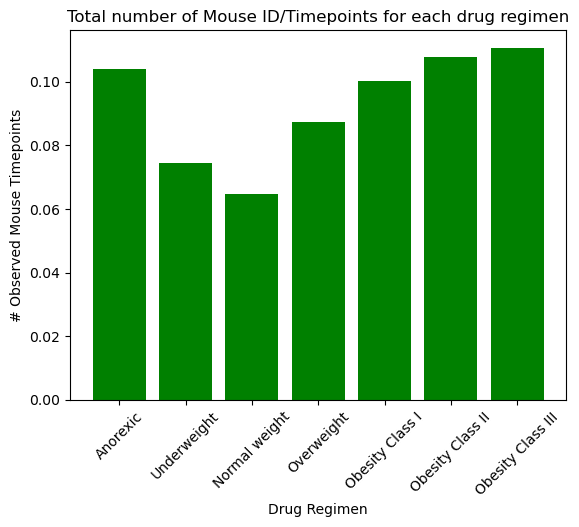

In [10]:
# drug_regimen_list = mouse_timepoints_count.index     # find labels for each bar in the plot --
y_values = heart_disease_by_mass_catg       # data series works for Matplotlib  -- 
plt.xlabel('Drug Regimen')
plt.xticks (rotation=45)
plt.ylabel('# Observed Mouse Timepoints')
plt.title('Total number of Mouse ID/Timepoints for each drug regimen')
plt.bar(group_labels, y_values, color="g", align="center")
plt.show()

In [11]:
BRFSS2022 = pd.read_csv("heart_2022_no_nans.csv")
population2 = len(BRFSS2022)
BRFSS2022


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [13]:
BRFSS2022["Mass_categ"] = pd.cut(BRFSS2022["BMI"], BMI_ranges, labels=group_labels)
BRFSS2022["cvd_binary"] = 0
BRFSS2022["active_binary"] = 0
BRFSS2022.loc[BRFSS2022['HadHeartAttack'] == 'Yes', "cvd_binary"] = 1
BRFSS2022.loc[BRFSS2022['PhysicalActivities'] == 'Yes', "active_binary"] = 1   # inactivity is 0
BRFSS2022.head(20)
# BMI_ranges

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,Mass_categ,cvd_binary,active_binary
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,No,No,Yes,Yes,"Yes, received Tdap",No,No,Overweight,0,1
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Obesity Class I,0,1
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obesity Class I,0,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Obesity Class I,0,1
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Obesity Class I,0,1
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,Obesity Class I,0,1
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Obesity Class I,0,1
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Normal weight,1,1
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,...,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,Overweight,0,0
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Normal weight,0,1


In [14]:
yes_heartdisease_count2 = len(BRFSS2022[(BRFSS2022['HadHeartAttack'] == "Yes")])
no_heartdisease_count2 = len(BRFSS2022[(BRFSS2022['HadHeartAttack'] == "No")])
print(yes_heartdisease_count2, no_heartdisease_count2)
grouped_by_mass_catg2 = BRFSS2022.groupby(["Mass_categ"])
heart_disease_by_mass_catg2 = grouped_by_mass_catg2["cvd_binary"].mean()
heart_disease_by_mass_catg2
heart_disease_by_active_catg2 = grouped_by_mass_catg2["active_binary"].mean()
norm_cvd_by_mass_catg2 = heart_disease_by_mass_catg2/(yes_heartdisease_count2/(yes_heartdisease_count2+no_heartdisease_count2))
norm_cvd_by_mass_catg2
heart_disease_by_active_catg2


13435 232587


C:\Users\mrindfleisch\AppData\Local\Temp\ipykernel_19180\1488659536.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_mass_catg2 = BRFSS2022.groupby(["Mass_categ"])


Mass_categ
Anorexic             0.666016
Underweight          0.744917
Normal weight        0.837093
Overweight           0.808590
Obesity Class I      0.738977
Obesity Class II     0.678983
Obesity Class III    0.581359
Name: active_binary, dtype: float64

In [15]:
kag_open_source = pd.read_csv("Cardio_Data.csv")  # cited in many papers
population3 = len(kag_open_source)
kag_open_source

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,50.391781,m,168,62,110,80,1,1,0,0,1,0
1,55.419178,f,156,85,140,90,3,1,0,0,1,1
2,51.663014,f,165,64,130,70,3,1,0,0,0,1
3,48.282192,m,169,82,150,100,1,1,0,0,1,1
4,47.873973,f,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,m,168,76,120,80,1,1,1,0,1,0
69996,61.920548,f,158,126,140,90,2,2,0,0,1,1
69997,52.235616,m,183,105,180,90,3,1,0,1,0,1
69998,61.454795,f,163,72,135,80,1,2,0,0,0,1


In [16]:
kag_open_source['bmi'] = kag_open_source['weight'] / (((kag_open_source['height'])/100)**2)
kag_open_source["Mass_categ"] = pd.cut(kag_open_source["bmi"], BMI_ranges, labels=group_labels)
kag_open_source

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target,bmi,Mass_categ
0,50.391781,m,168,62,110,80,1,1,0,0,1,0,21.967120,Normal weight
1,55.419178,f,156,85,140,90,3,1,0,0,1,1,34.927679,Obesity Class I
2,51.663014,f,165,64,130,70,3,1,0,0,0,1,23.507805,Normal weight
3,48.282192,m,169,82,150,100,1,1,0,0,1,1,28.710479,Overweight
4,47.873973,f,156,56,100,60,1,1,0,0,0,0,23.011177,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,m,168,76,120,80,1,1,1,0,1,0,26.927438,Overweight
69996,61.920548,f,158,126,140,90,2,2,0,0,1,1,50.472681,Obesity Class III
69997,52.235616,m,183,105,180,90,3,1,0,1,0,1,31.353579,Obesity Class I
69998,61.454795,f,163,72,135,80,1,2,0,0,0,1,27.099251,Overweight


In [17]:
yes_heartdisease_count3 = len(kag_open_source[(kag_open_source['target'] == 1)])
no_heartdisease_count3 = len(kag_open_source[(kag_open_source['target'] == 0)])
print(yes_heartdisease_count3, no_heartdisease_count3)
grouped_by_mass_catg3 = kag_open_source.groupby(["Mass_categ"])
heart_disease_by_mass_catg3 = grouped_by_mass_catg3["target"].mean()
heart_disease_by_active_catg3 = grouped_by_mass_catg3["active"].mean()
norm_cvd_by_mass_catg3 = heart_disease_by_mass_catg3/(yes_heartdisease_count3/(yes_heartdisease_count3+no_heartdisease_count3))
norm_cvd_by_mass_catg3
heart_disease_by_active_catg3

34979 35021


C:\Users\mrindfleisch\AppData\Local\Temp\ipykernel_19180\3662541192.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_mass_catg3 = kag_open_source.groupby(["Mass_categ"])


Mass_categ
Anorexic             0.833333
Underweight          0.842640
Normal weight        0.804938
Overweight           0.807243
Obesity Class I      0.800704
Obesity Class II     0.791752
Obesity Class III    0.775909
Name: active, dtype: float64

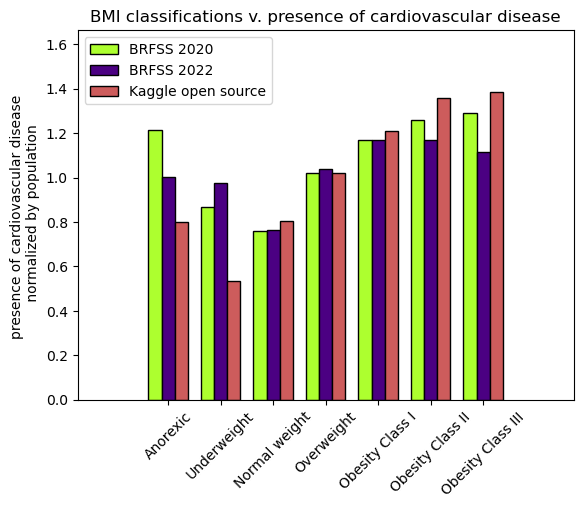

In [31]:
n=7
r = np.arange(n) 
width = 0.25
#   plt.bar(group_labels, y_values, color="g", align="center")
  
plt.bar(r, norm_cvd_by_mass_catg, color = 'greenyellow', 
        width = width, edgecolor = 'black', 
        label='BRFSS 2020') 
plt.bar(r + width, norm_cvd_by_mass_catg2, color = 'indigo', 
        width = width, edgecolor = 'black', 
        label='BRFSS 2022') 
plt.bar(r + width+width, norm_cvd_by_mass_catg3, color = 'indianred', 
        width = width, edgecolor = 'black', 
        label='Kaggle open source') 
plt.xticks(r + width,group_labels, rotation =45) 
plt.margins(0.2)
plt.xlabel(" ")
plt.ylabel("presence of cardiovascular disease \n normalized by population")
plt.title('BMI classifications v. presence of cardiovascular disease')
plt.legend() 
plt.savefig("bmi.png")
plt.show()

In [19]:
heart_disease_by_active_catg2.value_counts
# group_labels

<bound method IndexOpsMixin.value_counts of Mass_categ
Anorexic             0.666016
Underweight          0.744917
Normal weight        0.837093
Overweight           0.808590
Obesity Class I      0.738977
Obesity Class II     0.678983
Obesity Class III    0.581359
Name: active_binary, dtype: float64>

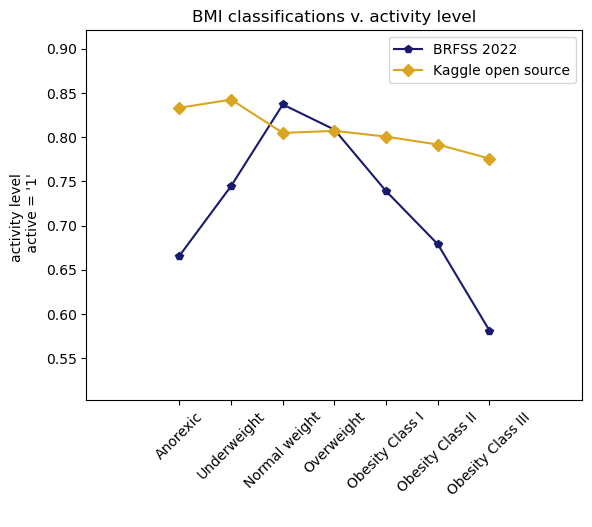

In [29]:
n=7
r = np.arange(n) 
width = 0.25
  
# plt.bar(r, norm_cvd_by_mass_catg, color = 'greenyellow', 
#         width = width, edgecolor = 'black', 
#         label='BRFSS 2020') 
# plt.bar(r, heart_disease_by_active_catg2, color = 'indigo', 
#         width = width, edgecolor = 'black', 
#         label='BRFSS 2022') 
# plt.bar(r + width, heart_disease_by_active_catg3, color = 'indianred', 
#         width = width, edgecolor = 'black', 
#         label='Kaggle open source')  

y_axis2 = heart_disease_by_active_catg2
y_axis3 = heart_disease_by_active_catg3
plt.plot(group_labels, y_axis2, marker = 'p', color = 'midnightblue', label = 'BRFSS 2022')
plt.plot(group_labels, y_axis3, marker = 'D', color = 'goldenrod', label = 'Kaggle open source')
plt.xticks(group_labels, rotation =45) 
plt.xlabel(" ")
plt.ylabel("activity level \n active = '1'")
plt.title('BMI classifications v. activity level')
plt.margins(0.3)
plt.legend() 
plt.savefig("bmi-activity.png")
plt.show()

4921 8514 49783


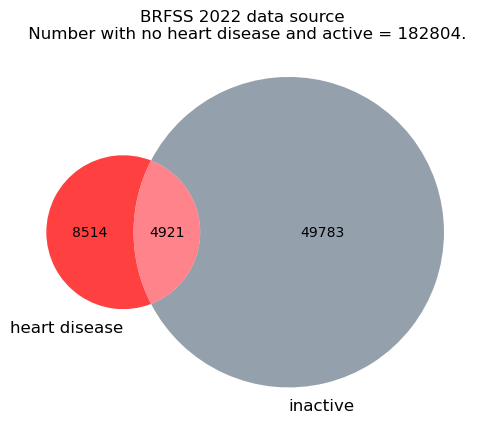

In [72]:
heartdisease_and_inactive2 = len(BRFSS2022[(BRFSS2022['cvd_binary'] == 1) & (BRFSS2022['active_binary'] == 0)])
heartdisease_and_active2 = len(BRFSS2022[(BRFSS2022['cvd_binary'] == 1) & (BRFSS2022['active_binary'] == 1)])
noheartdisease_and_inactive2 = len(BRFSS2022[(BRFSS2022['cvd_binary'] == 0) & (BRFSS2022['active_binary'] == 0)])
noheartdisease_and_active2 = population2 - (heartdisease_and_active2+heartdisease_and_inactive2+noheartdisease_and_inactive2)
print(heartdisease_and_inactive2, heartdisease_and_active2, noheartdisease_and_inactive2)
venn2(subsets = (heartdisease_and_active2, noheartdisease_and_inactive2, heartdisease_and_inactive2), \
      set_labels = ('heart disease', 'inactive'), set_colors= ('r', 'slategrey'), alpha=0.75)
plt.title(f'BRFSS 2022 data source \n Number with no heart disease and active = {noheartdisease_and_active2}.')
plt.savefig("BRFSS22_activity.png")
plt.show()

7361 27618 6378


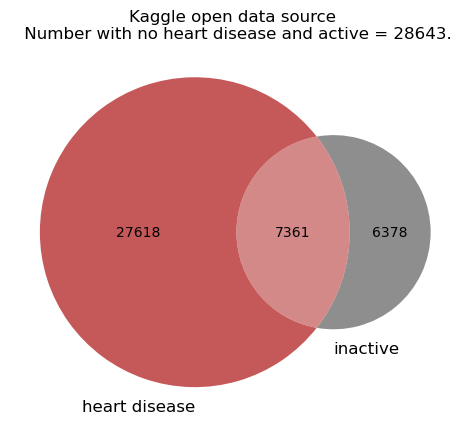

In [33]:
heartdisease_and_inactive3 = len(kag_open_source[(kag_open_source['target'] == 1) & (kag_open_source['active'] == 0)])
heartdisease_and_active3 = len(kag_open_source[(kag_open_source['target'] == 1) & (kag_open_source['active'] == 1)])
noheartdisease_and_inactive3 = len(kag_open_source[(kag_open_source['target'] == 0) & (kag_open_source['active'] == 0)])
noheartdisease_and_active3 = population3 - (heartdisease_and_active3+heartdisease_and_inactive3+noheartdisease_and_inactive3)
print(heartdisease_and_inactive3, heartdisease_and_active3, noheartdisease_and_inactive3)
venn2(subsets = (heartdisease_and_active3, noheartdisease_and_inactive3, heartdisease_and_inactive3), \
      set_labels = ('heart disease', 'inactive'), set_colors= ('firebrick', 'dimgrey'), alpha=0.75)
plt.title(f'Kaggle open data source \n Number with no heart disease and active = {noheartdisease_and_active3}.')
plt.savefig("Kaggle_activity.png")
plt.show()